# Práctica Limpieza
- Fecha: 14 de marzo de 2025

## Integrantes:
- Jorge Emiliano Pomar | A01709338
- Francisco Couttolenc Ortíz | A01754959

## Data acquisition y Data Wrangling
En este ejercicio aplicaremos los conocimientos aprendidos hasta el momento de adquisición de datos y de data wrangling.

In [2]:
# Importa aqui las librerias necesarias para tu practica
import pandas as pd
!pip install missingno
import missingno as msno

import sqlite3


## Parte 1 - Lectura:
Consultas SQL

### Consulta 1
(10 pts)


Crea una conexión a la base `nba_salary.sqlite`. Carga a un dataframe registros de salarios del equipo Houston (*HOU*).

In [3]:
conn =  sqlite3.connect("nba_salary.sqlite")
conn

### Consulta 2

(10 pts)

Carga a un dataframe solo los nombres, equipos y salarios de jugadores con salario mayor que 10 millones de dólares.

In [4]:
df = pd.read_sql_query(
    'SELECT Tm, Player, season17_18 FROM NBA_season1718_salary WHERE season17_18 > 10000000', conn
)
df

,Tm,Player,season17_18
0,GSW,Stephen Curry,34682550.0
1,CLE,LeBron James,33285709.0
2,DEN,Paul Millsap,31269231.0
3,BOS,Gordon Hayward,29727900.0
4,DET,Blake Griffin,29512900.0
...,...,...,...
117,MIL,Mirza Teletovic,10500000.0
118,IND,Bojan Bogdanovic,10500000.0
119,DET,Jon Leuer,10497319.0
120,SAC,Iman Shumpert,10337079.0


### Consulta 3
(10 pts)

Extrae las siguientes estadísticas correspondientes al año 2017:
* Promedio de edad (AGE)
* Mínimo de puntos (PTS)
* Máximo de puntos

In [5]:
df1 = pd.read_sql_query(
    'SELECT AVG(Age) FROM Seasons_Stats WHERE Year = 2017', conn
)
df1

,AVG(Age)
0,26.406723


In [6]:
df2 = pd.read_sql_query(
    'SELECT MIN(PTS) FROM Seasons_Stats', conn)
df2

,MIN(PTS)
0,0.0


In [7]:
df3 = pd.read_sql_query(
    'SELECT MAX(PTS) FROM Seasons_Stats', conn)
df3

,MAX(PTS)
0,4029.0


### Consulta 4
(10 pts)
Carga a un dataframe los mínimos, promedios y máximos de salarios por equipo.

In [8]:
df= pd.concat([pd.DataFrame(df1), pd.DataFrame(df2), pd.DataFrame(df3)])
df

,AVG(Age),MIN(PTS),MAX(PTS)
0,26.406723,NaN,NaN
0,NaN,0.0,NaN
0,NaN,NaN,4029.0


### Consulta 5 - Carga a dataframes
(10 pts)

Extrae sus tablas a un dataframe y muestra 5 registros de cada una (utiliza nombres explicativos).

In [9]:
salary = pd.DataFrame(pd.read_sql_query('SELECT * FROM NBA_season1718_salary', conn))

In [10]:
salary.head(5)

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [11]:
stats = pd.DataFrame(pd.read_sql_query('SELECT * FROM Seasons_Stats', conn))

In [12]:
stats.head(5)

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Parte 2 - Limpieza

(5 pts)
Muestra cuántos datos nulos tiene cada tabla.

In [13]:
salary.isnull().sum()

,0
X1,0
Player,0
Tm,0
season17_18,0


In [14]:
stats.isnull().sum()

,0
X1,0
Year,67
Player,67
Pos,67
Age,75
Tm,67
G,67
GS,18444
MP,553
PER,590


### Visualización
(5 pts)
Muestra alguna visualización para los valores faltantes en la tabla de salarios.

<Axes: >

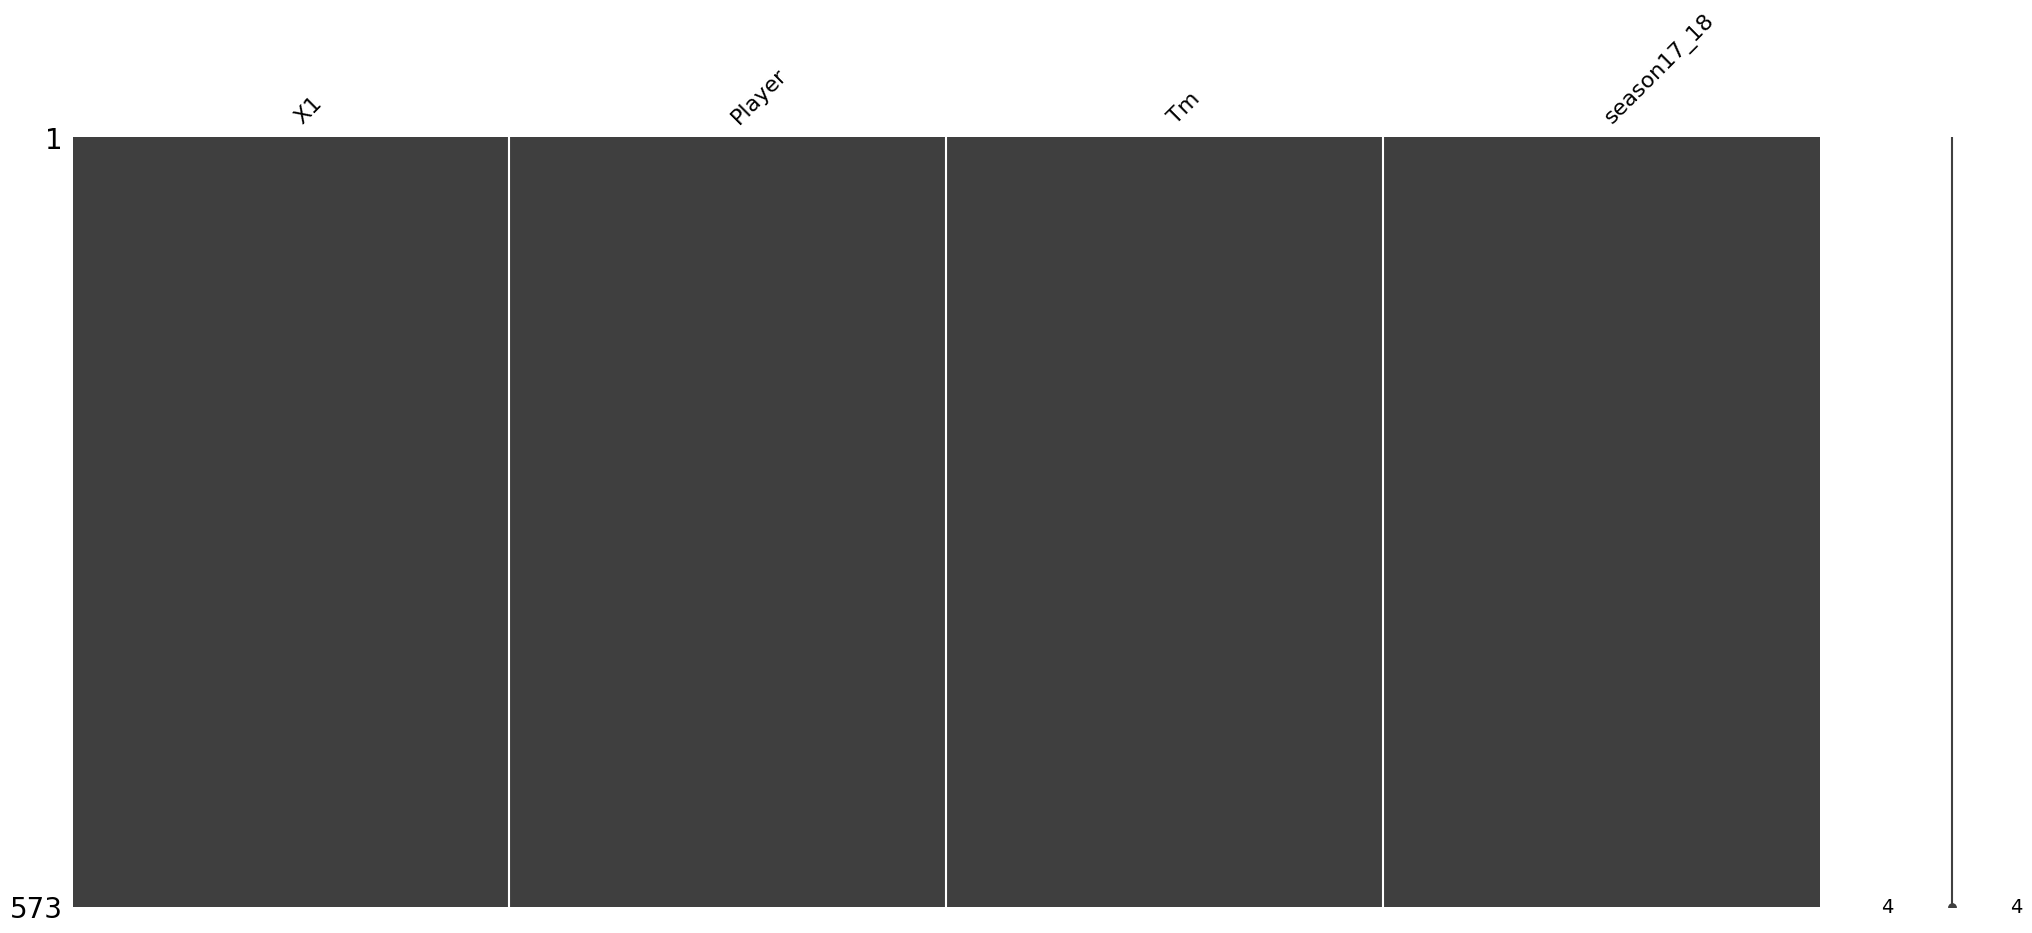

In [15]:
msno.matrix(salary)

### Analiza que columnas y filas eliminar, responde y justifica
(5 pts)
* Debemos borrar filas de `df_sal`?
* Debemos borrar columnas de `df_sal`?

Segun tu respuesta, realiza las modificaciones al dataframe (15 pts).

## ***Respuesta***:
*No es necesario borrar columnas ni rellenar datos en este caso porque la visualización gráfica con mátrix muestra las columnas completas de la tabla.*

### Nulos en tabla de estadísticas
(5 pts)

Analiza el dataframe de estadísticas y muestra la suma de nulos por variable.

<Axes: >

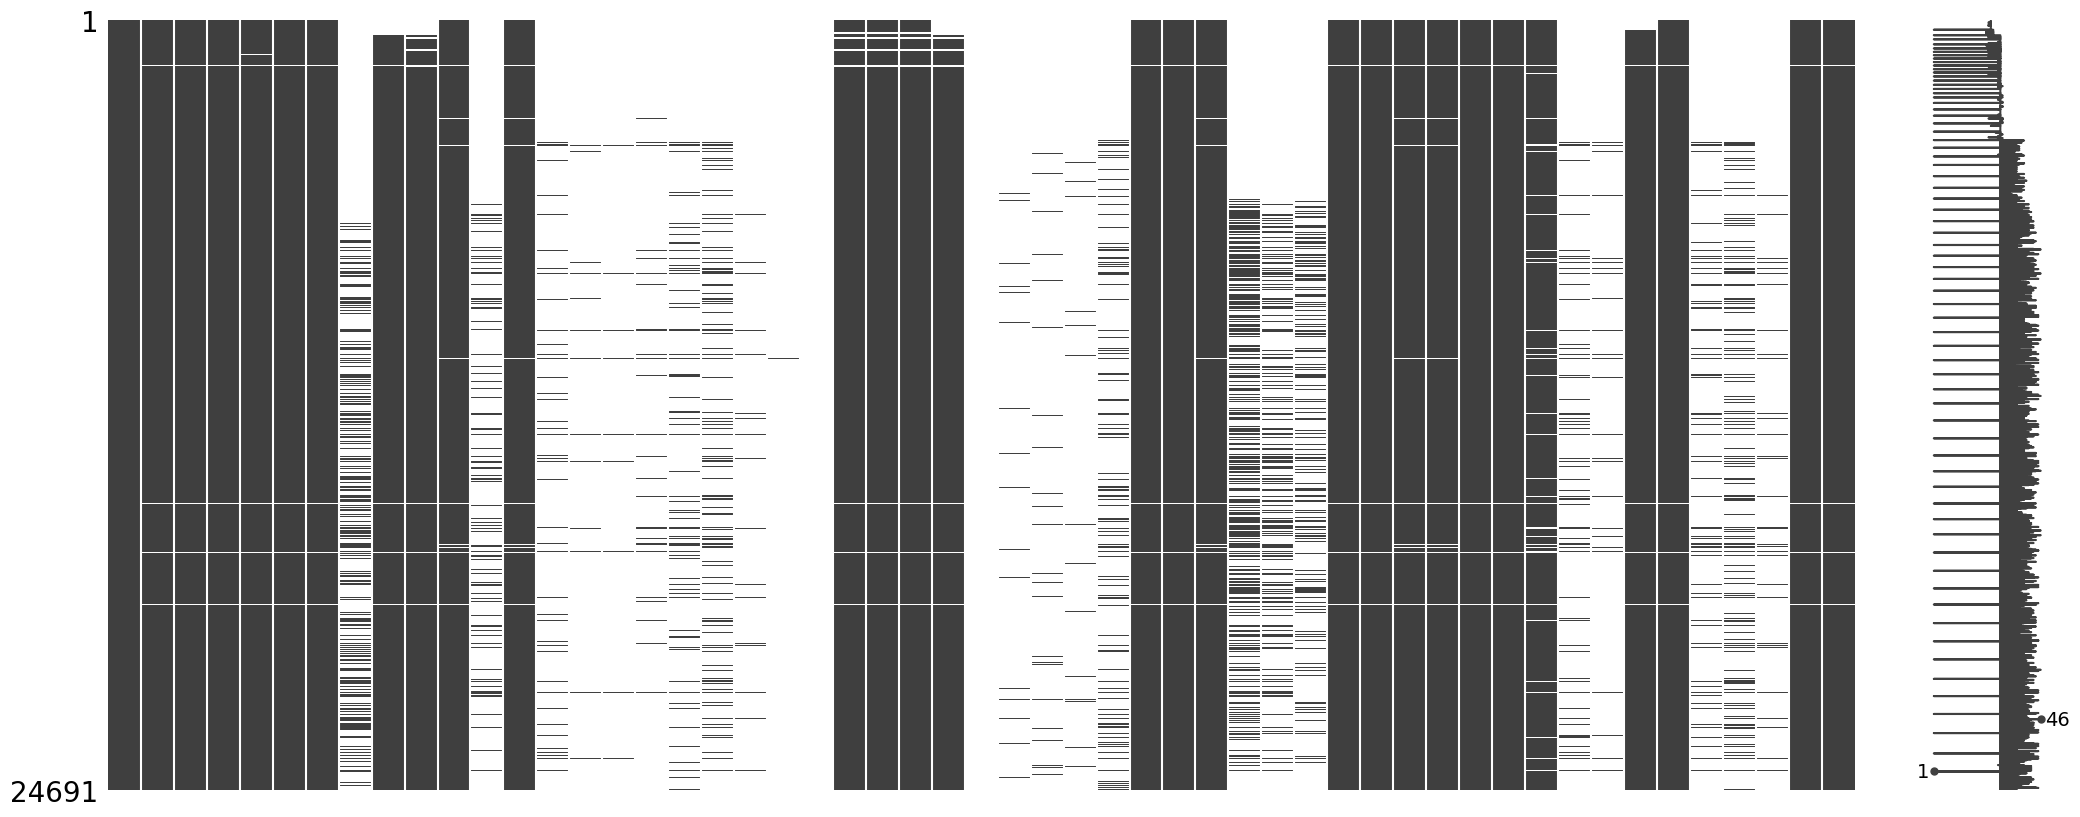

In [16]:
msno.matrix(stats)

In [17]:
stats.isnull().sum()

,0
X1,0
Year,67
Player,67
Pos,67
Age,75
Tm,67
G,67
GS,18444
MP,553
PER,590


<Axes: >

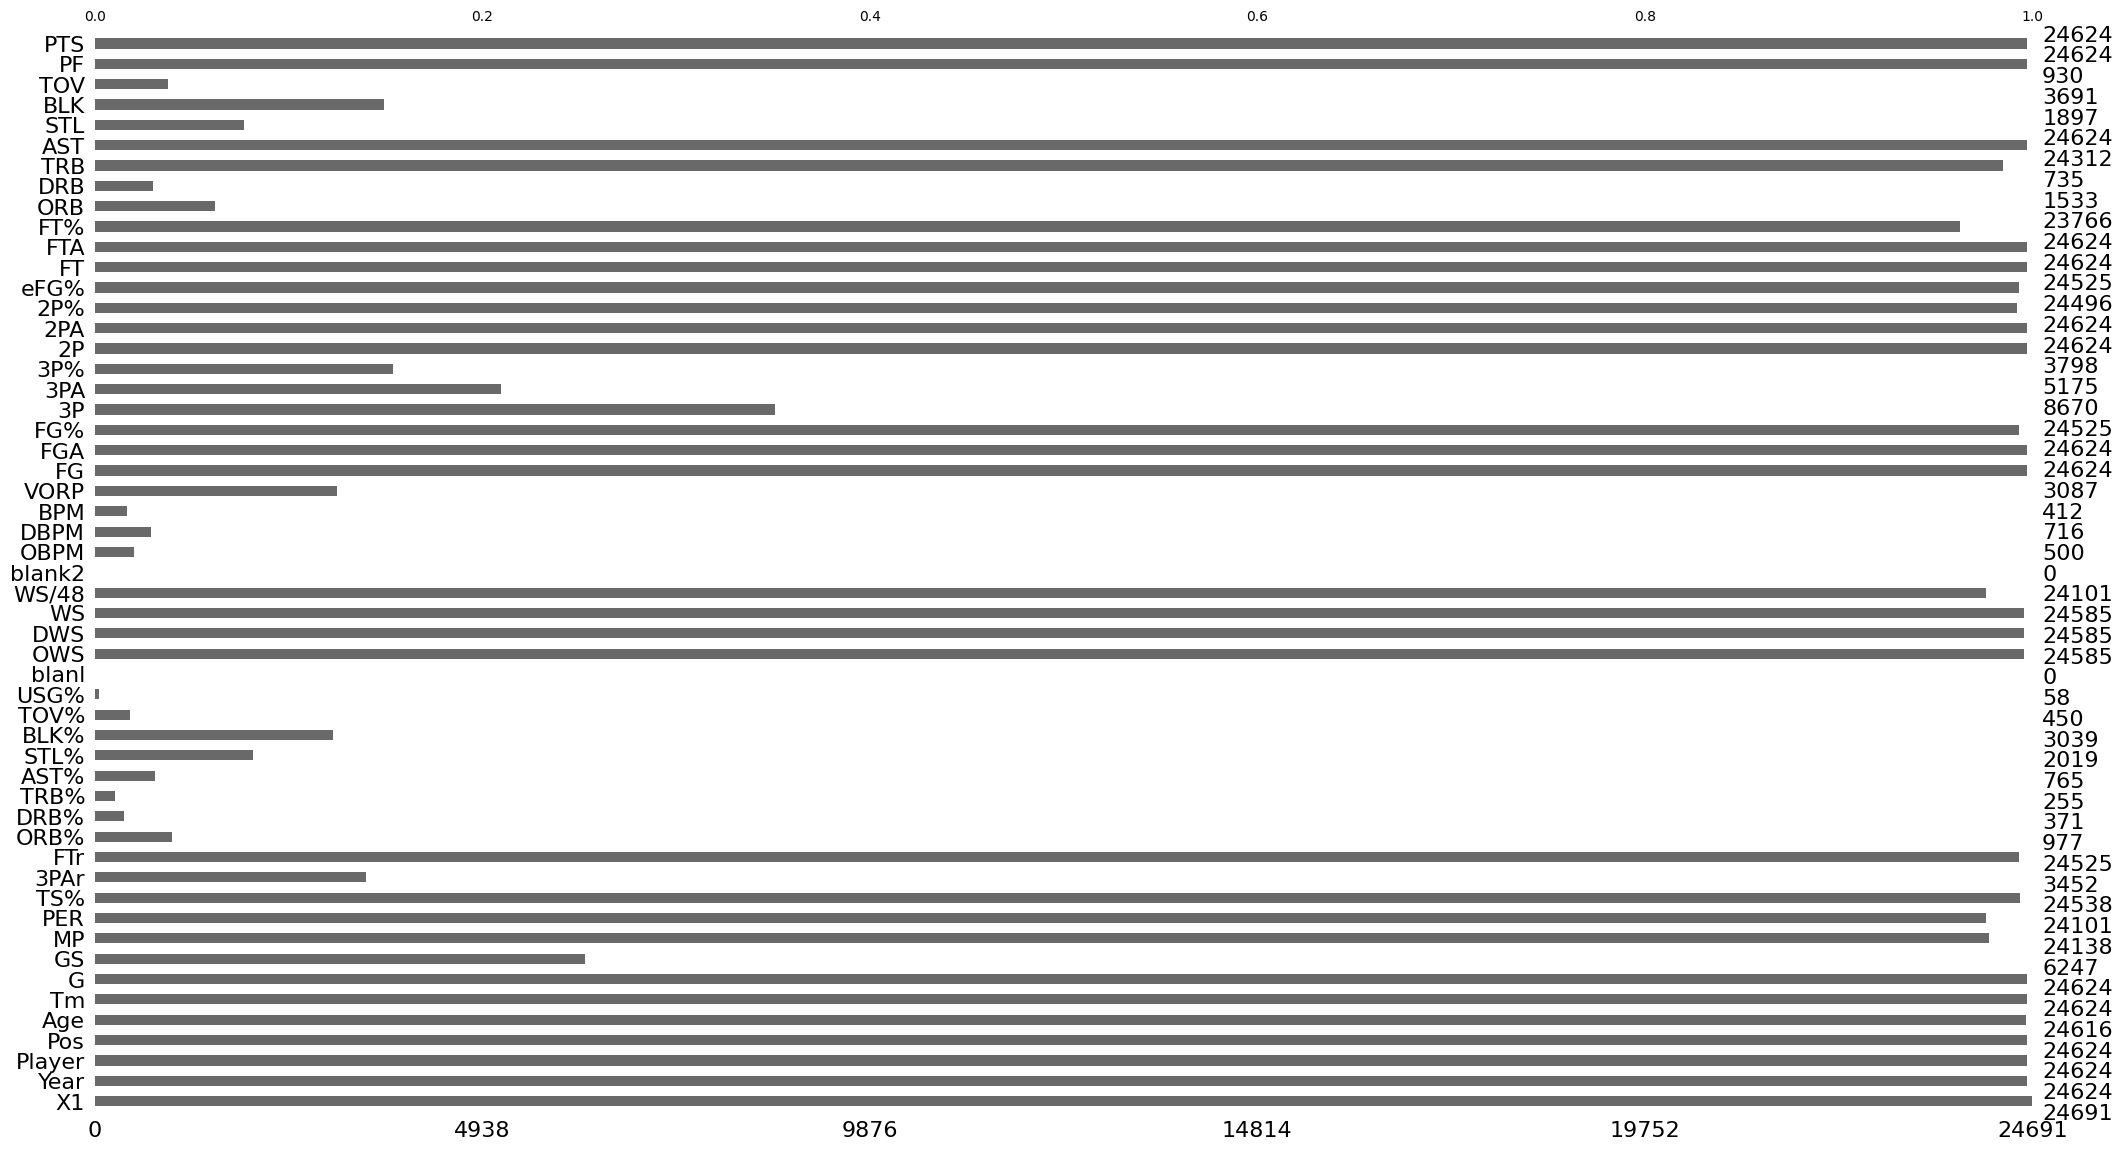

In [18]:
msno.bar(stats)

### Responde
* Debemos borrar filas de `df_sts`?
* Debemos borrar columnas de `df_sts`?

Segun tu respuesta, realiza las modificaciones al dataframe.

### ***Respuesta***
Dado que tenemos muchas columnas vacías y muchos datos nulos. Debemos de limpiar el dataframe quitando primero blank1 y blank2 que no contiene datos.

<Axes: >

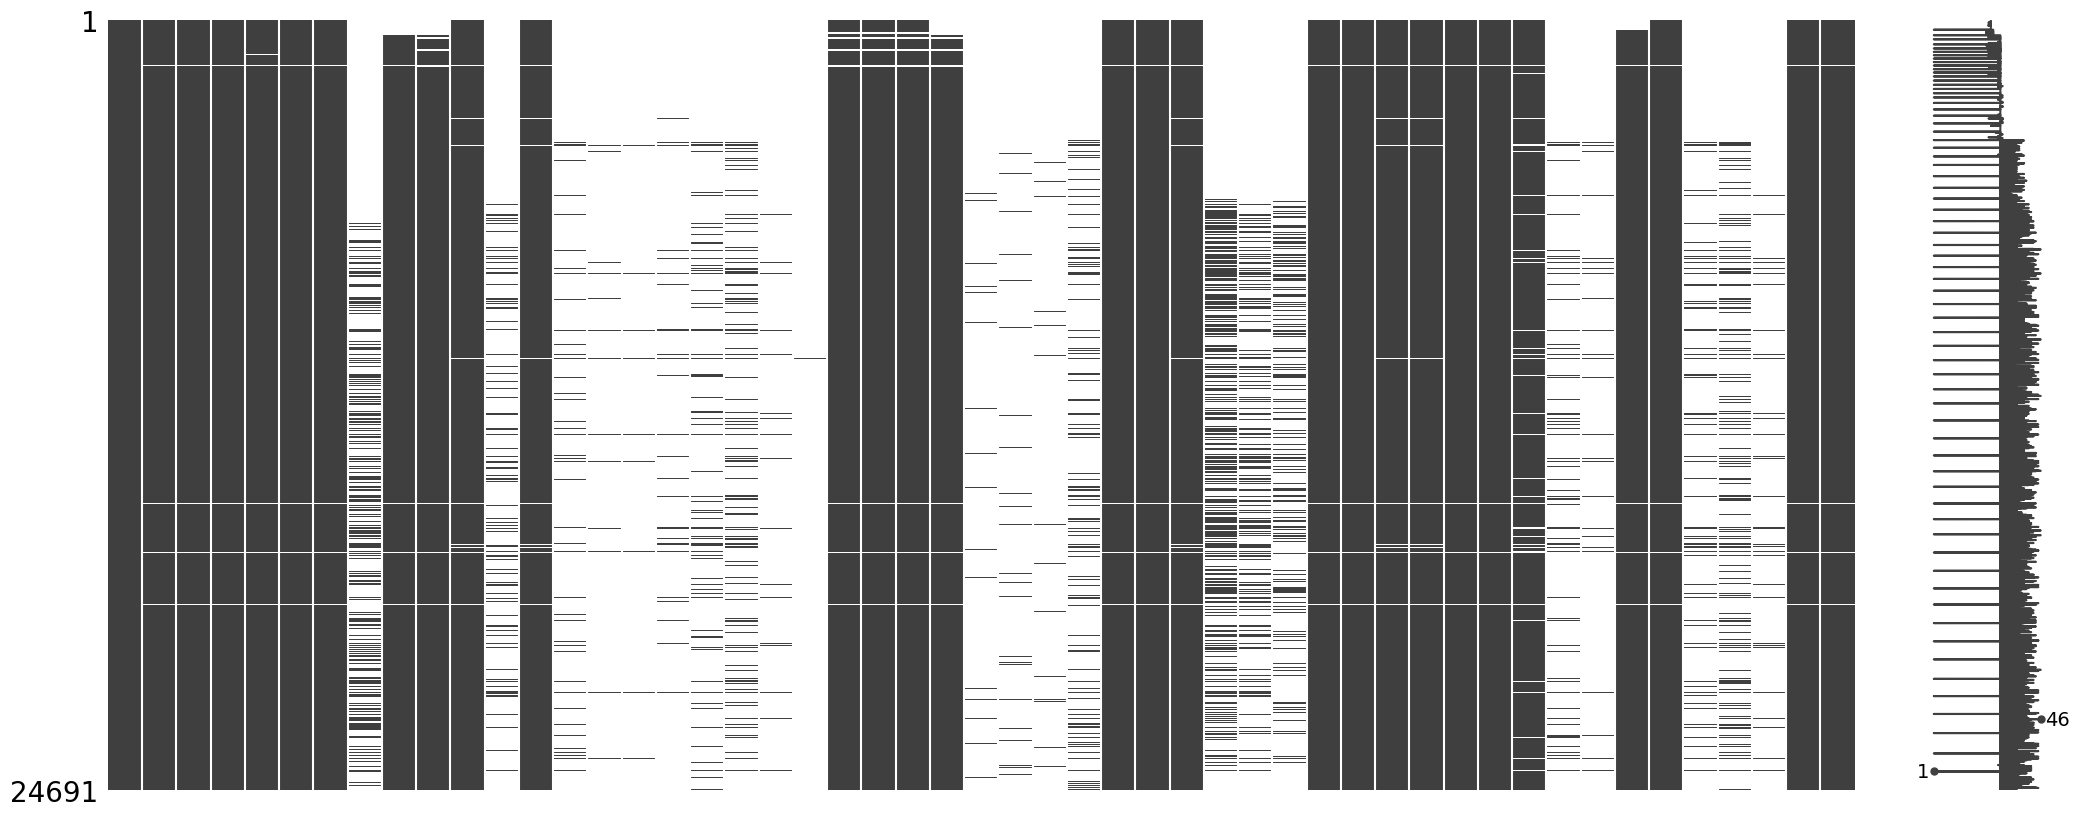

In [19]:
columnas_vacias = stats.dropna(axis='columns', thresh=5, inplace=True)
msno.matrix(stats)

In [20]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      24691 non-null  float64
 1   Year    24624 non-null  float64
 2   Player  24624 non-null  object 
 3   Pos     24624 non-null  object 
 4   Age     24616 non-null  float64
 5   Tm      24624 non-null  object 
 6   G       24624 non-null  float64
 7   GS      6247 non-null   float64
 8   MP      24138 non-null  float64
 9   PER     24101 non-null  float64
 10  TS%     24538 non-null  float64
 11  3PAr    3452 non-null   float64
 12  FTr     24525 non-null  float64
 13  ORB%    977 non-null    float64
 14  DRB%    371 non-null    float64
 15  TRB%    255 non-null    float64
 16  AST%    765 non-null    float64
 17  STL%    2019 non-null   float64
 18  BLK%    3039 non-null   float64
 19  TOV%    450 non-null    float64
 20  USG%    58 non-null     float64
 21  OWS     24585 non-null  float64
 22

<Axes: >

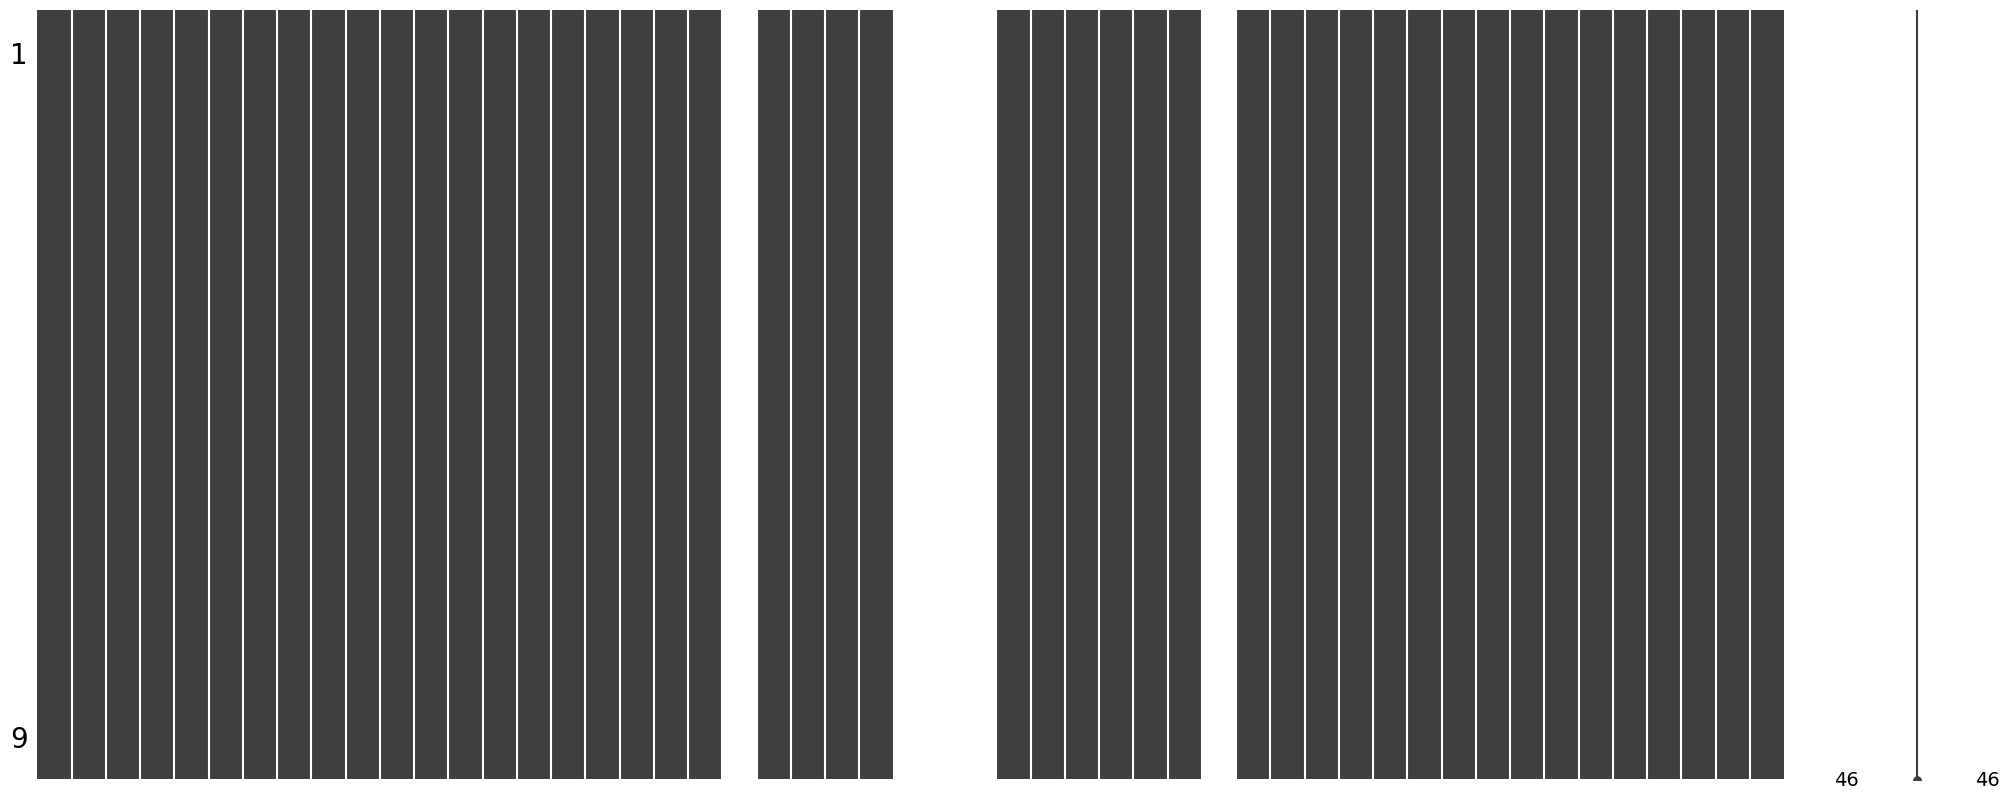

In [21]:
renglones_vacios = stats.dropna(axis='index', thresh=46, inplace=True)
msno.matrix(stats)

In [22]:
stats.isnull().sum()

,0
X1,0
Year,0
Player,0
Pos,0
Age,0
Tm,0
G,0
GS,0
MP,0
PER,0


### Imputación
Despues de tratar nulos en el dataframe de estadísticas, analiza nuevamente y responde:
* Debemos imputar valores de `df_sts`?
* De ser el caso, cómo debemos imputar sus variables?

Segun tu respuesta, realiza las modificaciones al dataframe y muestra el resultado.

In [23]:
stats.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9.0,14264.555556,5310.679808,7358.000,10244.000,14454.000,16519.000,22419.000
Year,9.0,1998.555556,10.501323,1984.000,1991.000,1999.000,2004.000,2014.000
Age,9.0,26.555556,4.034573,23.000,24.000,26.000,27.000,36.000
G,9.0,1.888889,1.536591,1.000,1.000,1.000,2.000,5.000
GS,9.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
MP,9.0,7.888889,4.284987,2.000,6.000,6.000,11.000,14.000
PER,9.0,4.077778,30.465463,-19.800,-17.300,-5.100,16.200,76.300
TS%,9.0,0.411111,0.366073,0.000,0.174,0.266,0.773,1.064
3PAr,9.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
FTr,9.0,1.377889,1.140585,0.400,0.667,1.000,2.000,4.000


<Axes: >

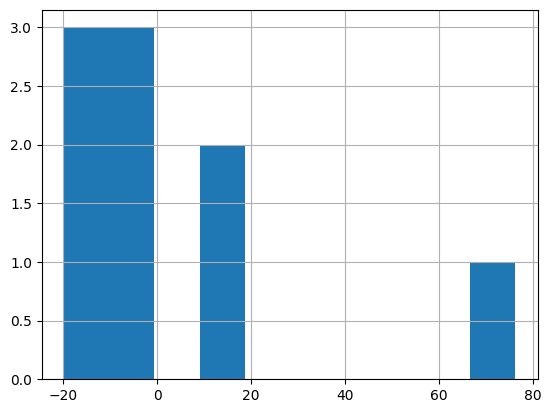

In [24]:
stats['PER'].hist()

In [25]:
stats['PER'].describe()

,PER
count,9.000000
mean,4.077778
std,30.465463
min,-19.800000
25%,-17.300000
50%,-5.100000
75%,16.200000
max,76.300000


<Axes: >

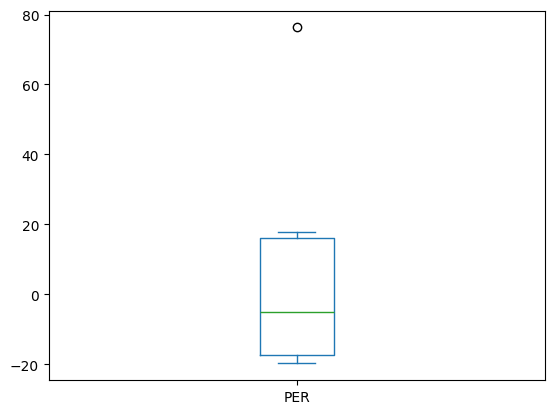

In [26]:
stats['PER'].plot(kind='box')

### ***Respuesta***
Después de utilizar un describe, descubrimos que hay muchos datos en ceros que indican que hay faltantes. Decidimos imputar con la mediana estos datos vacíos. Además descubrimos que la columna de PER tiene valores muy altos y muy bajos. Esto debería de ser un error porque no es posible que un jugador tenga una eficiencia tan alta y tan baja. Y al ver el box plot, podemos concluír que estos valores son atípicos o outliers porque están muy alejados de lo que es el rango normal.

In [27]:
stats[stats['PER'] > 40]

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10244,10244.0,1991.0,Ian Lockhart,SF,23.0,PHO,1.0,0.0,2.0,76.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


- Haciendo un poco de investigación, encontramos que en las estadísticas de 1991, el jugador Ian Lockhart en efecto tuvo ese PER de 76.3. Así que no es un error en los datos. 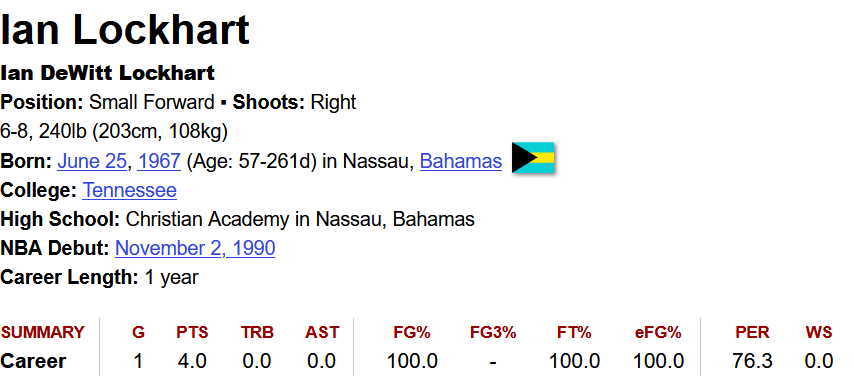

https://www.basketball-reference.com/players/l/lockhia01.html

In [28]:
stats[stats['PER'] < 0]

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7358,7358.0,1984.0,Charles Jones,PF,26.0,PHI,1.0,0.0,3.0,-19.5,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8128,8128.0,1986.0,Brian Martin,SF,23.0,POR,5.0,0.0,14.0,-4.3,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
12055,12055.0,1995.0,Rich King,C,25.0,SEA,2.0,0.0,6.0,-19.8,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14454,14454.0,1999.0,Monty Williams,SF,27.0,DEN,1.0,0.0,6.0,-7.6,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16368,16368.0,2003.0,Don Reid,PF,29.0,DET,1.0,0.0,10.0,-17.3,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
22419,22419.0,2014.0,Dewayne Dedmon,C,24.0,GSW,4.0,0.0,6.0,-5.1,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


- Revisando los PER que están por debajo de 0, estos si no coinciden, es decir, las otras estadísticas apuntan a un mejor PER que los que tienen ahí. Debe de haber un error en los datos porque no pueden estar negativos con las otras estadísticas.
Así que decidimos imputar reemplazando los datos por el promedio.

In [34]:
stats['PER'].mean()

8.855555555555556

-  El problema es que la media en este caso está muy afectada por outliers porque está muy alejada de lo que es la mediana de -5.1. Así que decidimos usar una media ajustada que no cayera en outliers del quartil inferior 5% o superior 95% como se veía en la box plot.

In [39]:
media_sinoutliers = stats[stats['PER'].between(stats['PER'].quantile(0.05), stats['PER'].quantile(0.95))]['PER'].mean()
stats['PER'].fillna(media_sinoutliers, inplace=True)



<ipython-input-39-97435f153666>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats['PER'].fillna(media_sinoutliers, inplace=True)


- Y así tenemos que hay cero valores negativos en PER.

In [40]:
stats[stats['PER'] < 0]

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


- Finalmente, así se ve nuestro dataframe de stats después de imputar PER y limpiar los datos nulos.

In [ ]:
stats

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7358,7358.0,1984.0,Charles Jones,PF,26.0,PHI,1.0,0.0,3.0,8.855556,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8128,8128.0,1986.0,Brian Martin,SF,23.0,POR,5.0,0.0,14.0,8.855556,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0
10244,10244.0,1991.0,Ian Lockhart,SF,23.0,PHO,1.0,0.0,2.0,76.300000,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
12055,12055.0,1995.0,Rich King,C,25.0,SEA,2.0,0.0,6.0,8.855556,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14454,14454.0,1999.0,Monty Williams,SF,27.0,DEN,1.0,0.0,6.0,8.855556,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16368,16368.0,2003.0,Don Reid,PF,29.0,DET,1.0,0.0,10.0,8.855556,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
16519,16519.0,2004.0,Dana Barros,SG,36.0,BOS,1.0,0.0,11.0,17.800000,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0
20836,20836.0,2011.0,Trey Johnson,SG,26.0,LAL,1.0,0.0,13.0,16.200000,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
22419,22419.0,2014.0,Dewayne Dedmon,C,24.0,GSW,4.0,0.0,6.0,8.855556,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
